In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
def make_cordinate(image,line_parametrs):
    slope,intercept=line_parametrs
    y1=image.shape[0]
    y2=int(y1*3/5)
    x1=int((y1-intercept)/slope)
    x2=int((y2 - intercept) / slope)
    return np.array([x1,y1,x2,y2])

In [5]:
def avg_intercept_slope(image,lines):
    left_fit=[]
    right_fit=[]
    for line in lines:
        x1,y1,x2,y2=line.reshape(4)
        parameters=np.polyfit((x1,x2),(y1,y2),1)
        slope=parameters[0]
        intercept=parameters[1]
        # print(slope)
        # print(intercept)
        if slope<0:
            left_fit.append((slope,intercept))
        else:
            right_fit.append((slope, intercept))

    avg_left_fit=np.average(left_fit,axis=0)
    avg_right_fit=np.average(right_fit,axis=0)
    # print(avg_right_fit)
    # print(avg_left_fit)
    left_line=make_cordinate(image,avg_left_fit)
    right_line=make_cordinate(image,avg_right_fit)
    return np.array([left_line,right_line])

In [6]:
def canny(image):
    gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    blur = cv2.GaussianBlur(gray, (5, 5), 0)
    canny_ = cv2.Canny(blur, 50, 150)
    return canny_

In [7]:
def display_lines(image,lines):
    line_image=np.zeros_like(image)
    if lines is not None:
        for line in lines:
            x1,y1,x2,y2=line.reshape(4)
            cv2.line(line_image,(x1,y1),(x2,y2),(20,255,57),thickness=5)
    return line_image

In [8]:
def region_of_interest(image):
    height=image.shape[0]
    triangle=np.array([[(200,height),(1100,height),(550,250)]])
    mask=np.zeros_like(image)
    cv2.fillPoly(mask,triangle,255)
    masked_image=cv2.bitwise_and(image,mask)
    return masked_image

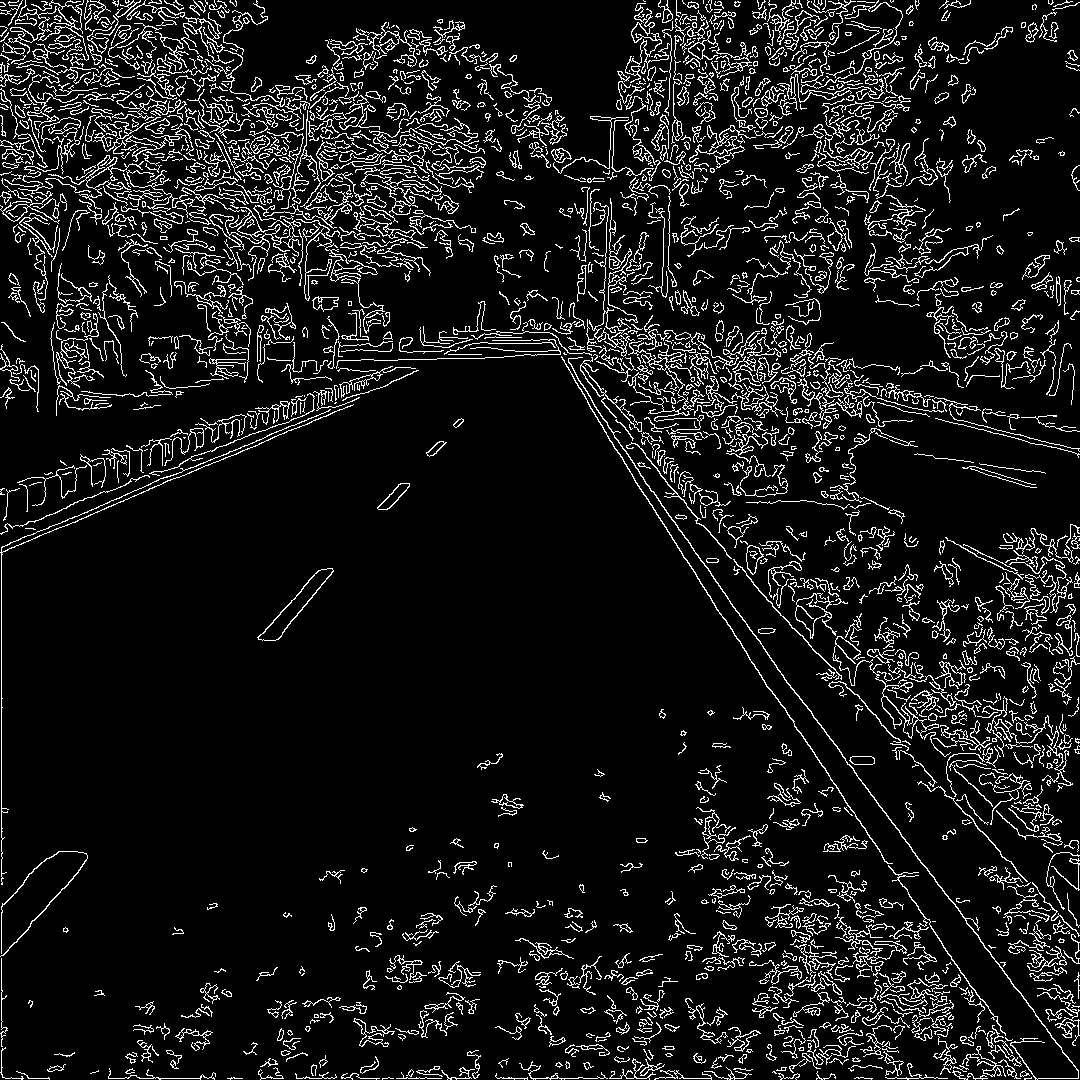

In [12]:

img=cv2.imread('/content/drive/MyDrive/PennFudanPed/Codes/Canny+Hough/test.png')
lane_img=np.copy(img)
canny_image=canny(lane_img)
cropped_image=region_of_interest(canny_image)
lines=cv2.HoughLinesP(cropped_image,2,np.pi/180,100,np.array([]),minLineLength=40,maxLineGap=5)
avg_line=avg_intercept_slope(lane_img,lines)

line_image=display_lines(lane_img,avg_line)
combined_image=cv2.addWeighted(lane_img,1,line_image,1,1)
cv2_imshow(canny_image)


In [10]:
from google.colab.patches import cv2_imshow

In [ ]:
cap=cv2.VideoCapture('/content/drive/MyDrive/PennFudanPed/Codes/Canny+Hough/test2.mp4')
while (cap.isOpened()):
    _,frame=cap.read()
    canny_image = canny(frame)
    cropped_image = region_of_interest(canny_image)
    lines = cv2.HoughLinesP(cropped_image, 2, np.pi / 180, 100, np.array([]), minLineLength=40, maxLineGap=5)
    avg_line = avg_intercept_slope(frame, lines)
    line_image = display_lines(frame, avg_line)
    combined_image = cv2.addWeighted(frame, 1, line_image, 1, 1)
    cv2_imshow(combined_image)
#     cv2.waitKey(1)
# #

Output hidden; open in https://colab.research.google.com to view.